<a href="https://colab.research.google.com/github/53-gm/Prog2kakushin/blob/main/work1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

適当なゲーム (pandas, numpy, opencv)

Graphics class

In [58]:
import numpy as np
import cv2
import sys
from google.colab.patches import cv2_imshow


class SpriteData:
    x = 0
    y = 0 
    width = 0
    height = 0
    color = (0, 0, 0)

class Graphics:
    def __init__(self, windowWidth, windowHeight, windowName, windowColor):
        self.width, self.height = windowWidth, windowHeight
        self.winname = windowName
        self.window = np.zeros( (self.height, self.width, 3), np.uint8 )
        self.windowColor = windowColor
        self.window[:] = (windowColor[0], windowColor[1], windowColor[2])
    def reset(self):
        self.window = np.zeros( (self.height, self.width, 3), np.uint8 )
        self.window[:] = (self.windowColor[0], self.windowColor[1], self.windowColor[2])
        cv2_imshow(self.window)
    def drawRect(self, p1, p2, color):
        cv2.rectangle(self.window, (int(p1[0]), int(p1[1])), (int(p2[0]), int(p2[1])), (color[0],color[1],color[2]), thickness=-1)
    def drawText(self, text: str, p, color, scale :float):
        cv2.putText(self.window, text, (int(p[0]), int(p[1])), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=scale, color=(color[0], color[1], color[2]), thickness=2)
    def show(self):
        cv2_imshow(self.window)


       


Map class

In [67]:
import pandas as pd

def calc2dArray(p: int, sizeX: int, sizeY: int):
  x = p % sizeX
  y = p // sizeY
  return x, y

class Field:
    def __init__(self, graphics, fieldSize, chipSize):
        self.sizeX = fieldSize[0]
        self.sizeY = fieldSize[1]
        self.chipSize = chipSize
        self.g = graphics
        self.field = pd.DataFrame()

        for i in range(self.sizeX * self.sizeY):
          self.field = self.field.append({'point':i, 'status':0}, ignore_index=True)

    def update(self):  
      pass
    def draw(self):
      for i in range(self.sizeX * self.sizeY):
        x, y = calc2dArray(self.field['point'][i], self.sizeX, self.sizeY)
        self.g.drawRect((x * self.chipSize, y * self.chipSize), (x * self.chipSize + self.chipSize, y * self.chipSize + self.chipSize), (255,255,255))  

        self.g.drawText(str(i), (x * self.chipSize + (self.chipSize / 2), y * self.chipSize + (self.chipSize / 2)), (0, 0, 0), 0.45)
        

Main

key1


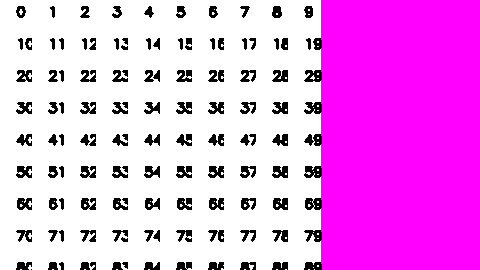

KeyboardInterrupt: ignored

In [70]:
import numpy as np
import cv2 
import sys 
import time


if __name__ == "__main__":
   graphics = Graphics(480, 270, 'Test', (255, 0, 255))
   field = Field(graphics, (10, 10), 32)

   while True:

      k = int(input('key'))  

      field.draw() 

      graphics.show()

   cv2.destroyAllWindows()


In [23]:
import pandas as pd

df = pd.DataFrame()

for i in range(10):
  df = df.append({'point':1}, ignore_index=True)

df['point'][0]

1.0